In [12]:
#pip install yfinance mplfinance

In [29]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import mplfinance as mpf
import seaborn as sb

In [14]:
tickers = ['TSLA', 'NVDA', 'SHOP', 'ZM']
start_date = '2020-01-01'
end_date = '2024-05-31'

data = yf.download(tickers, start=start_date, end=end_date)

[*********************100%***********************]  4 of 4 completed


In [15]:
data.head()

Price                     Adj Close                                     Close  \
Ticker                         NVDA       SHOP       TSLA         ZM     NVDA   
Date                                                                            
2020-01-02 00:00:00+00:00  5.973121  40.780998  28.684000  68.720001  5.99775   
2020-01-03 00:00:00+00:00  5.877518  40.429001  29.534000  67.279999  5.90175   
2020-01-06 00:00:00+00:00  5.902165  41.333000  30.102667  70.320000  5.92650   
2020-01-07 00:00:00+00:00  5.973620  41.450001  31.270666  71.900002  5.99825   
2020-01-08 00:00:00+00:00  5.984824  41.810001  32.809334  72.550003  6.00950   

Price                                                          High  \
Ticker                          SHOP       TSLA         ZM     NVDA   
Date                                                                  
2020-01-02 00:00:00+00:00  40.780998  28.684000  68.720001  5.99775   
2020-01-03 00:00:00+00:00  40.429001  29.534000  67.279999  5.94575   
2020-01-06 00:00:00+00:00  41.333000  30.102667  70.320000  5.93175   
2020-01-07 00:00:00+00:00  41.450001  31.270666  71.900002  6.04425   
2020-01-08 00:00:00+00:00  41.810001  32.809334  72.550003  6.05100   

Price                                 ...        Low                Open  \
Ticker                          SHOP  ...       TSLA         ZM     NVDA   
Date                                  ...                                  
2020-01-02 00:00:00+00:00  40.824001  ...  28.114000  68.019997  5.96875   
2020-01-03 00:00:00+00:00  40.840302  ...  29.128000  67.099998  5.87750   
2020-01-06 00:00:00+00:00  41.352001  ...  29.333332  65.811996  5.80800   
2020-01-07 00:00:00+00:00  42.248001  ...  30.224001  69.370003  5.95500   
2020-01-08 00:00:00+00:00  42.254501  ...  31.215334  71.029999  5.99400   

Price                                                          Volume  \
Ticker                          SHOP       TSLA         ZM       NVDA   
Date                                                                    
2020-01-02 00:00:00+00:00  40.398998  28.299999  68.800003  237536000   
2020-01-03 00:00:00+00:00  40.160000  29.366667  67.620003  205384000   
2020-01-06 00:00:00+00:00  39.859001  29.364668  66.629997  262636000   
2020-01-07 00:00:00+00:00  41.575001  30.760000  70.290001  314856000   
2020-01-08 00:00:00+00:00  41.393002  31.580000  71.809998  277108000   

Price                                                    
Ticker                         SHOP       TSLA       ZM  
Date                                                     
2020-01-02 00:00:00+00:00  13967000  142981500  1315500  
2020-01-03 00:00:00+00:00  10317000  266677500  1127900  
2020-01-06 00:00:00+00:00  16860000  151995000  3151600  
2020-01-07 00:00:00+00:00  15529000  268231500  6985400  
2020-01-08 00:00:00+00:00  15501000  467164500  2482300  

[5 rows x 24 columns]

In [16]:
adj_close = data['Adj Close']
adj_close = adj_close.fillna(method='ffill')

/var/folders/nb/fxty61xd7jsbp25hcb0fqkr00000gn/T/ipykernel_75256/2798281176.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  adj_close = adj_close.fillna(method='ffill')


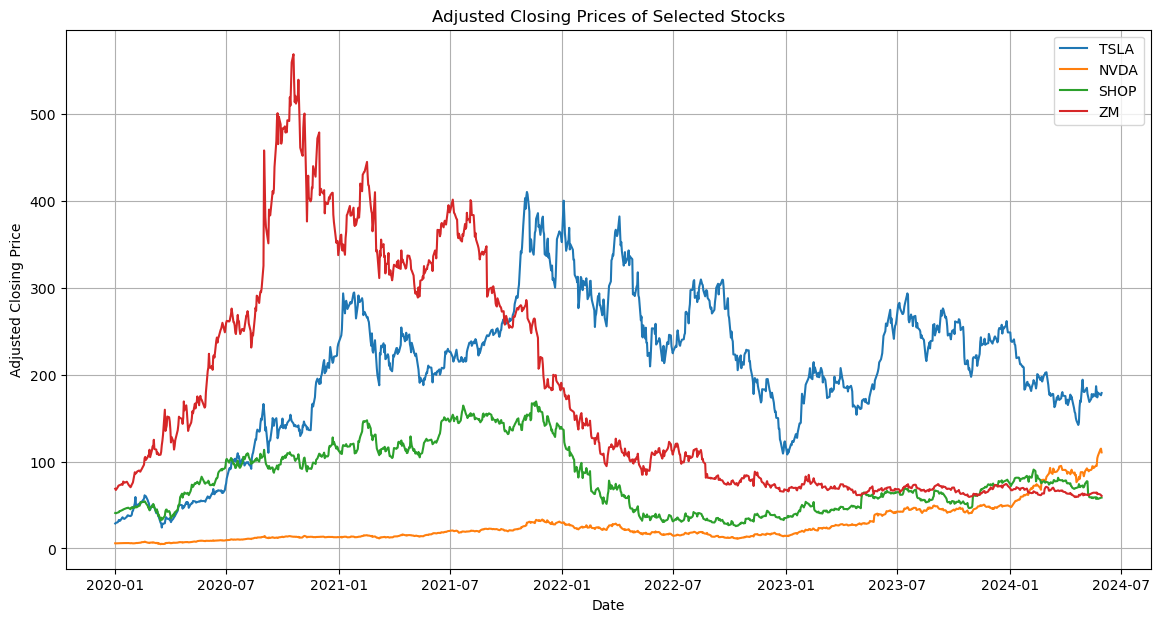

In [17]:
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(adj_close[ticker], label=ticker)
plt.title('Adjusted Closing Prices of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.grid(True)

In [20]:
#pip install pandas_datareader

In [34]:
from pandas_datareader import data as pdr

cpi = pdr.get_data_fred('CPIAUCSL', start=start_date, end=end_date)
cpi = cpi.ffill()

In [35]:
unemployment_rate = pdr.get_data_fred('UNRATE', start=start_date, end=end_date)
unemployment_rate = unemployment_rate.ffill()

In [36]:
gdp = pdr.get_data_fred('GDP', start=start_date, end=end_date)
gdp = gdp.ffill()

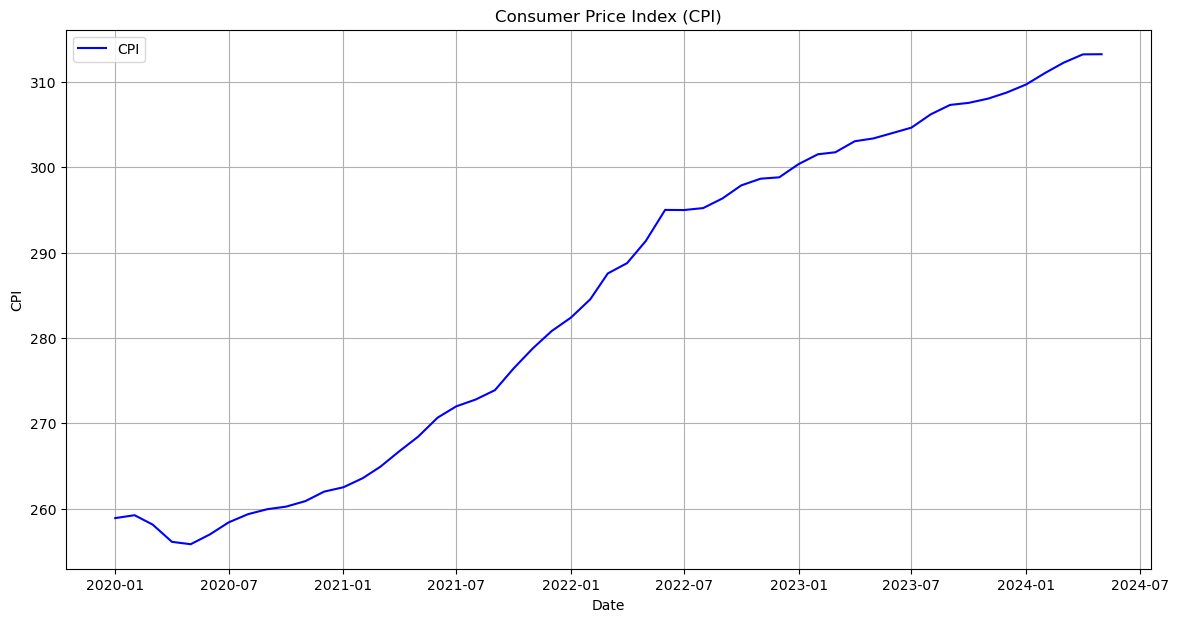

In [37]:
plt.figure(figsize=(14, 7))
plt.plot(cpi, label='CPI', color='blue')
plt.title('Consumer Price Index (CPI)')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()
plt.grid(True)

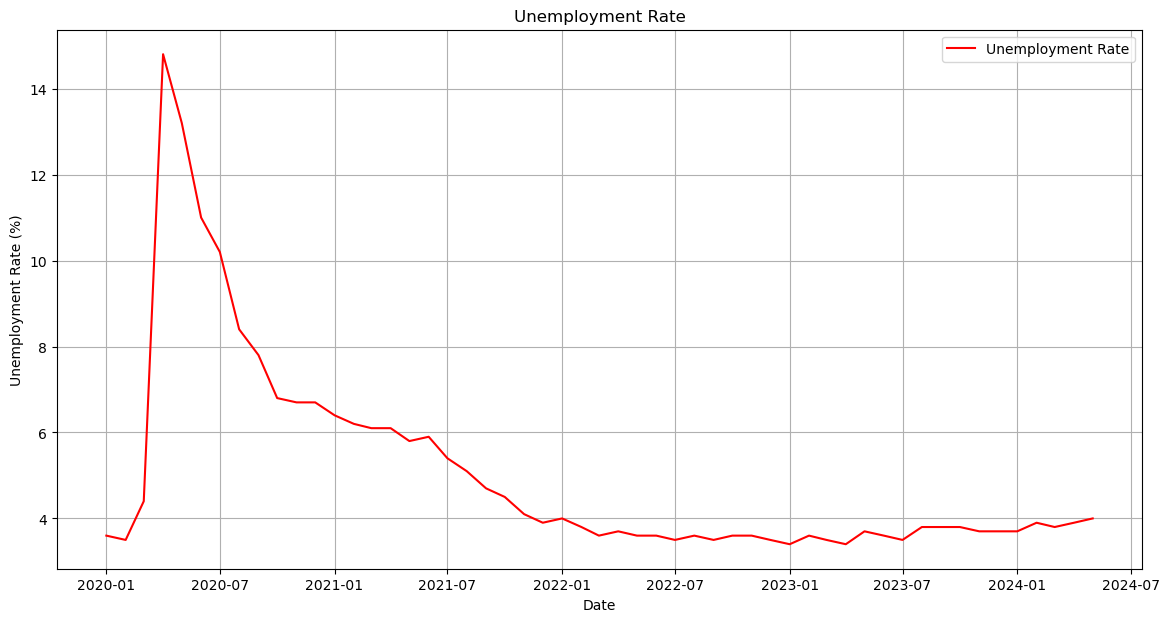

In [38]:
plt.figure(figsize=(14, 7))
plt.plot(unemployment_rate, label='Unemployment Rate', color='red')
plt.title('Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)

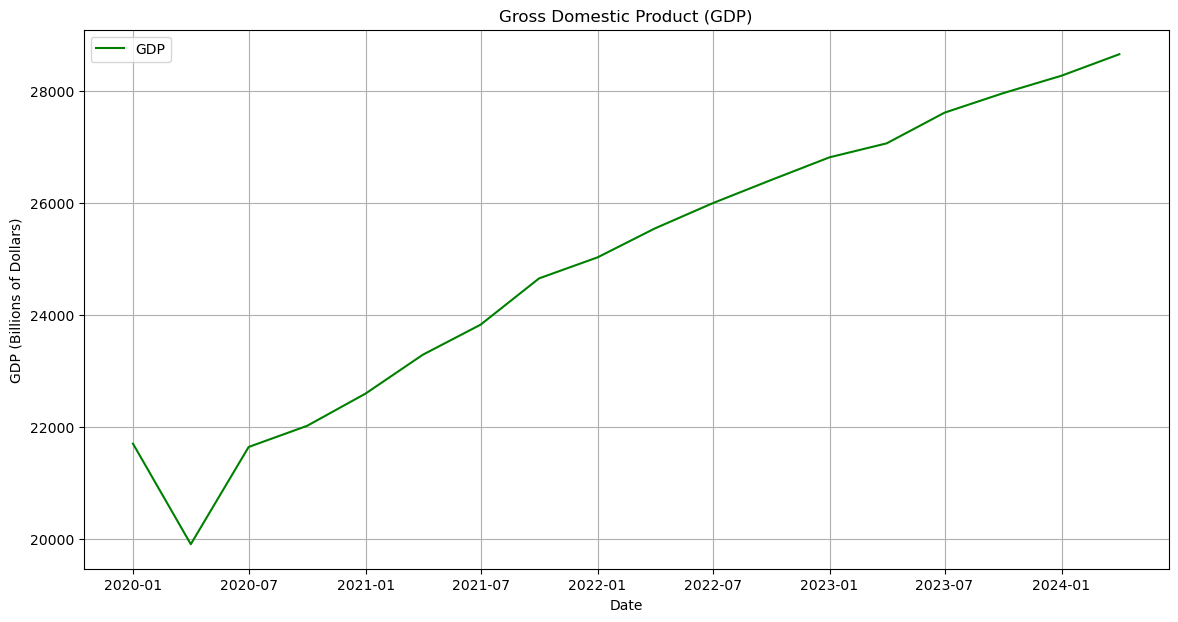

In [39]:
plt.figure(figsize=(14, 7))
plt.plot(gdp, label='GDP', color='green')
plt.title('Gross Domestic Product (GDP)')
plt.xlabel('Date')
plt.ylabel('GDP (Billions of Dollars)')
plt.legend()
plt.grid(True)

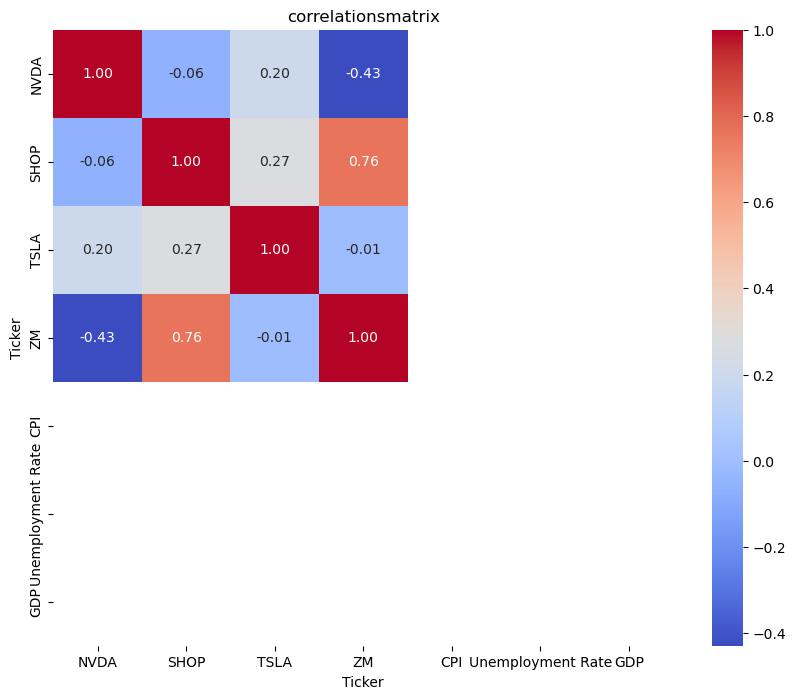

In [40]:
# Merging data
merged_data = adj_close.copy()
merged_data['CPI'] = cpi['CPIAUCSL']
merged_data['Unemployment Rate'] = unemployment_rate['UNRATE']
merged_data['GDP'] = gdp['GDP']

# Calculating correlation
correlation_matrix = merged_data.corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()